
\[# New section

In [1]:
# 📌 Step 1: Install required libraries (usually pre-installed in Colab)
!pip install pandas matplotlib seaborn

# 📌 Step 2: Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 📌 Step 3: Upload your dataset
from google.colab import files
uploaded = files.upload()

# 📌 Step 4: Read the file
filename = list(uploaded.keys())[0]
df = pd.read_csv(filename, encoding='ISO-8859-1')

# 📌 Step 5: Preview the data
print("Shape of dataset:", df.shape)
print("Columns in the DataFrame:", df.columns.tolist()) # Print available columns
df.head()

# 📌 Step 6: Convert monetary columns to numeric
money_cols = [
    'Approved/Declined Amount',
    'Disbursed/Shipped Amount',
    'Outstanding Exposure Amount',
    'Undisbursed Exposure Amount',
    'Small Business Authorized Amount',
    'Woman Owned Authorized Amount',
    'Minority Owned Authorized Amount'
]

for col in money_cols:
    df[col] = df[col].replace('[\$,]', '', regex=True).replace('', '0')
    df[col] = pd.to_numeric(df[col], errors='coerce').fillna(0)

# 📌 Step 7: Categorical vs Categorical — Heatmap (e.g., Decision vs Brokered)
# Checking available columns before proceeding
if 'Decision' in df.columns and 'TypeOfBusiness' in df.columns: # Assuming 'TypeOfBusiness' is a suitable alternative
    cat1 = 'Decision'
    cat2 = 'TypeOfBusiness' # Using 'TypeOfBusiness' as an alternative
    pivot = pd.crosstab(df[cat1], df[cat2])
    sns.heatmap(pivot, annot=True, cmap='Blues')
    plt.title(f'{cat1} vs {cat2}')
    plt.show()
else:
    print("Required columns for heatmap not found. Please check column names.")


# 📌 Step 8: Categorical vs Numerical — Boxplot (e.g., Decision vs Approved Amount)
if 'Decision' in df.columns and 'Approved/Declined Amount' in df.columns:
    sns.boxplot(data=df, x='Decision', y='Approved/Declined Amount')
    plt.title('Decision vs Approved Amount')
    plt.show()
else:
    print("Required columns for boxplot not found. Please check column names.")

# 📌 Step 9: Numerical vs Numerical — Scatter Plot (e.g., Approved vs Disbursed)
if 'Approved/Declined Amount' in df.columns and 'Disbursed/Shipped Amount' in df.columns and 'Decision' in df.columns:
    sns.scatterplot(
        data=df,
        x='Approved/Declined Amount',
        y='Disbursed/Shipped Amount',
        hue='Decision'
    )
    plt.title('Approved vs Disbursed Amount by Decision')
    plt.show()
else:
     print("Required columns for scatter plot not found. Please check column names.")


# 📌 Step 10: Correlation Heatmap for Numerical Columns
if all(col in df.columns for col in money_cols):
    numeric_df = df[money_cols]
    plt.figure(figsize=(10, 6))
    sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
    plt.title("Correlation between Monetary Features")
    plt.show()
else:
    print("Required monetary columns for correlation heatmap not found. Please check column names.")

KeyboardInterrupt: 

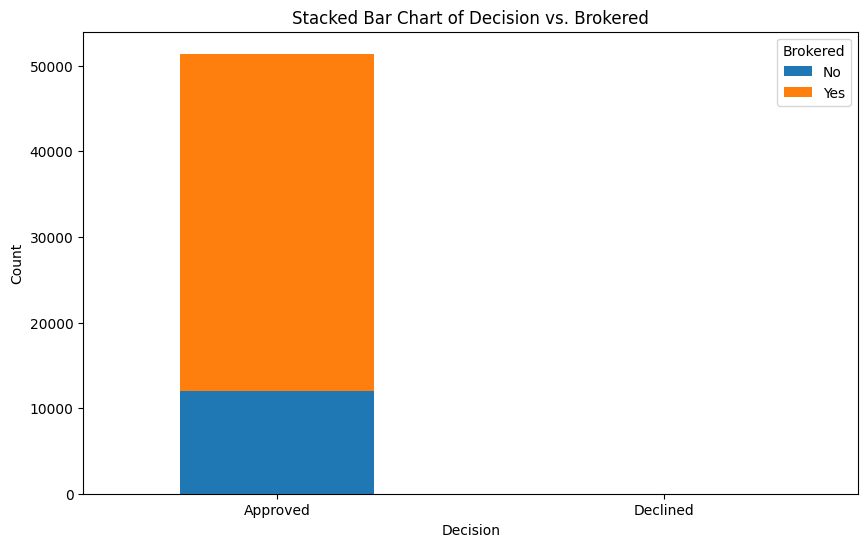

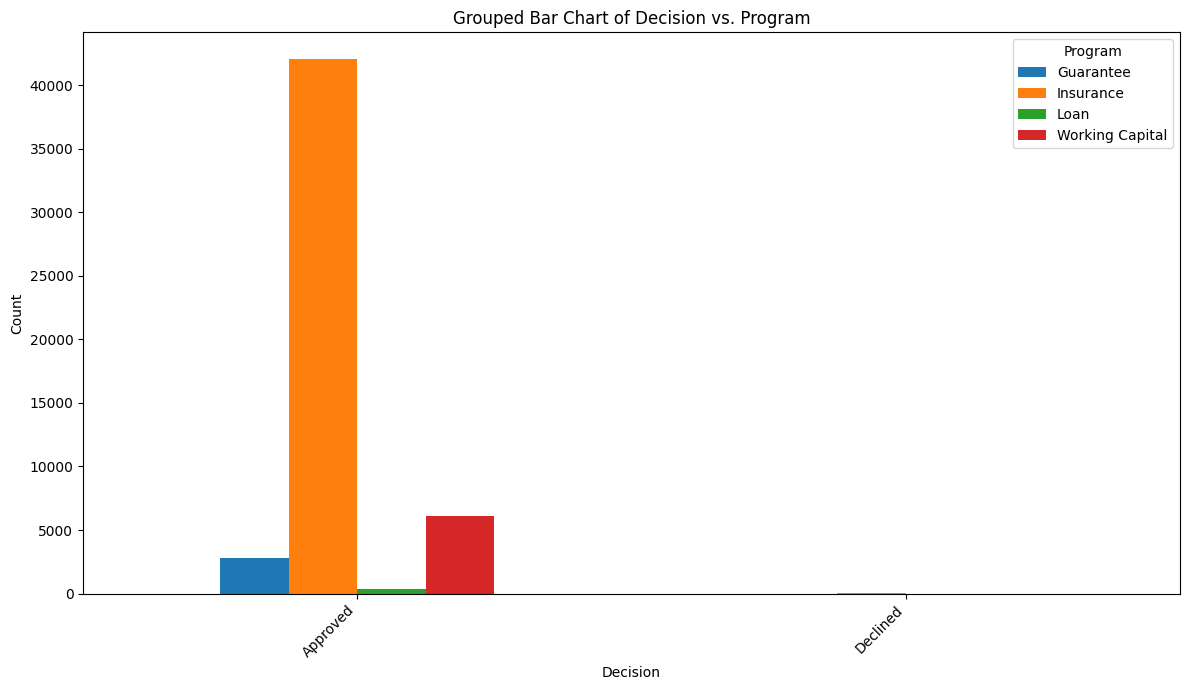

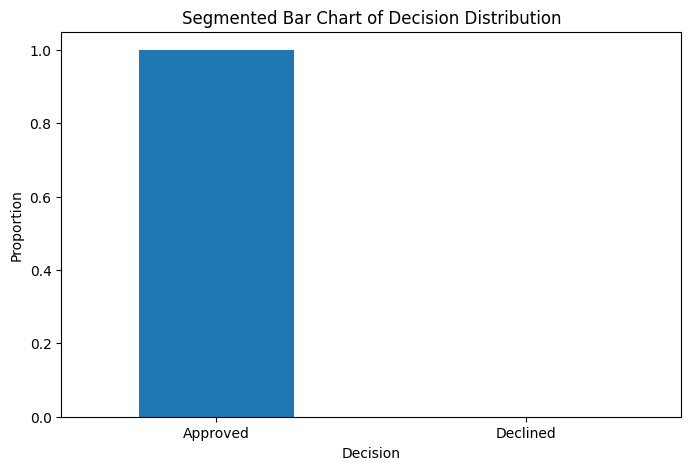

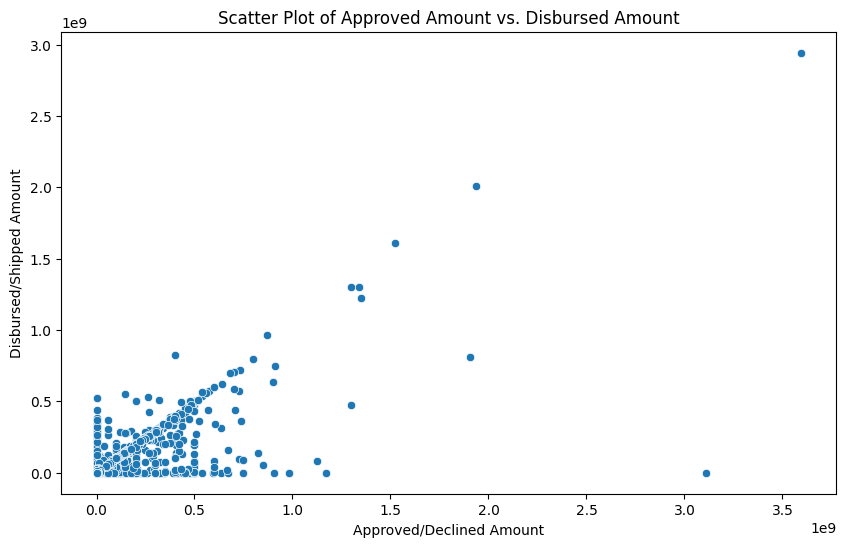

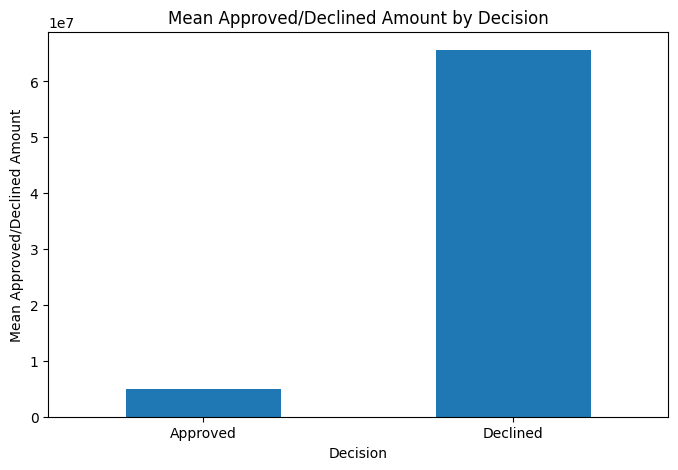

In [ ]:
# Generate Stacked Bar Chart (Example: Decision vs. Brokered)
if 'Decision' in df.columns and 'Brokered ' in df.columns:
    stacked_bar_data = df.groupby(['Decision', 'Brokered ']).size().unstack(fill_value=0)
    stacked_bar_data.plot(kind='bar', stacked=True, figsize=(10, 6))
    plt.title('Stacked Bar Chart of Decision vs. Brokered')
    plt.xlabel('Decision')
    plt.ylabel('Count')
    plt.xticks(rotation=0)
    plt.legend(title='Brokered')
    plt.show()
else:
    print("Required columns for stacked bar chart not found.")

# Generate Grouped Bar Chart (Example: Decision vs. Program)
if 'Decision' in df.columns and 'Program' in df.columns:
    grouped_bar_data = df.groupby(['Decision', 'Program']).size().unstack(fill_value=0)
    grouped_bar_data.plot(kind='bar', figsize=(12, 7))
    plt.title('Grouped Bar Chart of Decision vs. Program')
    plt.xlabel('Decision')
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.legend(title='Program')
    plt.tight_layout()
    plt.show()
else:
    print("Required columns for grouped bar chart not found.")

# Generate Segmented Bar Chart (Example: Decision distribution)
if 'Decision' in df.columns:
    segmented_bar_data = df['Decision'].value_counts(normalize=True)
    segmented_bar_data.plot(kind='bar', stacked=True, figsize=(8, 5))
    plt.title('Segmented Bar Chart of Decision Distribution')
    plt.xlabel('Decision')
    plt.ylabel('Proportion')
    plt.xticks(rotation=0)
    plt.show()
else:
    print("Required column for segmented bar chart not found.")


# Generate Scatter Plot (Example: Approved Amount vs. Disbursed Amount)
if 'Approved/Declined Amount' in df.columns and 'Disbursed/Shipped Amount' in df.columns:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df, x='Approved/Declined Amount', y='Disbursed/Shipped Amount')
    plt.title('Scatter Plot of Approved Amount vs. Disbursed Amount')
    plt.xlabel('Approved/Declined Amount')
    plt.ylabel('Disbursed/Shipped Amount')
    plt.show()
else:
    print("Required columns for scatter plot not found.")


# Generate Mean Approved by Decision Chart (Bar Chart)
if 'Decision' in df.columns and 'Approved/Declined Amount' in df.columns:
    mean_approved_by_decision = df.groupby('Decision')['Approved/Declined Amount'].mean()
    mean_approved_by_decision.plot(kind='bar', figsize=(8, 5))
    plt.title('Mean Approved/Declined Amount by Decision')
    plt.xlabel('Decision')
    plt.ylabel('Mean Approved/Declined Amount')
    plt.xticks(rotation=0)
    plt.show()
else:
    print("Required columns for mean approved by decision chart not found.")